In [6]:
import numpy as np
import pandas as pd

In [7]:
file_path = r"C:\Users\Adarsh Anand\Desktop\Projects\z Email Spam claassifier\spam.csv"
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")

#from google.colab import files
#uploaded = files.upload()

In [8]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [9]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3345,ham,U're welcome... Caught u using broken english ...,NaN,NaN,NaN
3619,ham,I meant as an apology from me for texting you ...,NaN,NaN,NaN
3951,ham,Me hungry buy some food good lei... But mum n ...,NaN,NaN,NaN
2761,ham,I am not sure about night menu. . . I know onl...,NaN,NaN,NaN
2228,ham,Those were my exact intentions,NaN,NaN,NaN
3122,ham,He telling not to tell any one. If so treat fo...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN
2652,ham,No need for the drug anymore.,NaN,NaN,NaN
3613,ham,Ok c Ì_ then.,NaN,NaN,NaN
165,ham,I place all ur points on e cultures module alr...,NaN,NaN,NaN


In [10]:
df.shape

(5572, 5)

In [11]:
#1. Data cleaning
#2. EDA
#3. Text Preprocessing
#4. Model Building
#5. Evaluation
#6. Improvement
#7. Website
#8. Deploy

##1. Data Cleaning

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
#drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [14]:
df.sample(10)

,v1,v2
5198,ham,She.s fine. I have had difficulties with her p...
1989,ham,The basket's gettin full so I might be by tonight
5516,ham,"Ya, i'm referin to mei's ex wat... No ah, wait..."
5244,ham,thanks for the temales it was wonderful. Thank...
4608,ham,Y de asking like this.
2213,ham,"Goodmorning, today i am late for 2hrs. Because..."
255,ham,Don't necessarily expect it to be done before ...
4138,ham,Ever green quote ever told by Jerry in cartoon...
2874,ham,"Idk. You keep saying that you're not, but sinc..."
4705,ham,Wow so healthy. Old airport rd lor. Cant thk o...


In [15]:
# renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
5132,ham,it's still not working. And this time i also t...
3665,ham,I'm turning off my phone. My moms telling ever...
2483,ham,Mm have some kanji dont eat anything heavy ok
3549,ham,Dad wanted to talk about the apartment so I go...
2323,ham,Sorry dude. Dont know how i forgot. Even after...


In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [17]:
df['target'] = encoder.fit_transform(df['target'])

0 -> ham, 1-> spam

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [20]:
#check for duplicate values
df.duplicated().sum()

403

In [21]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [22]:
df.duplicated().sum()

0

In [23]:
df.shape

(5169, 2)

##2.EDA

In [24]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

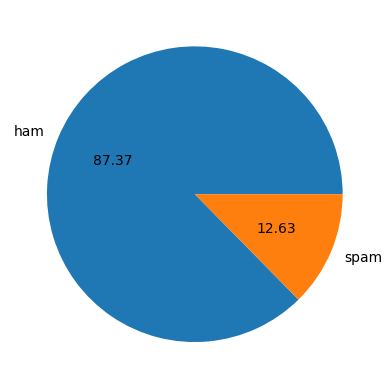

In [26]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham','spam'],autopct="%0.2f")
plt.show()

Data is imbalanced

In [27]:
import nltk

In [28]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\Adarsh
[nltk_data]     Anand\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [29]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [30]:
df['num_characters'] = df['text'].apply(len)

In [31]:
df.sample(10)

,target,text,num_characters
2506,0,Who u talking about?,20
4713,0,Oops i thk i dun haf enuff... I go check then ...,55
4107,0,Pls send me your address sir.,29
817,0,Also are you bringing galileo or dobby,38
4132,1,FreeMsg Today's the day if you are ready! I'm ...,152
2984,0,No break time one... How... I come out n get m...,60
4273,0,Ball is moving a lot.will spin in last :)so ve...,67
391,0,Hey so this sat are we going for the intro pil...,80
2891,0,Babe? You said 2 hours and it's been almost 4 ...,73
827,0,Hey. You got any mail?,22


In [32]:
# number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [33]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [34]:
# number of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [35]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
# ham messages
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
# spam messages
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


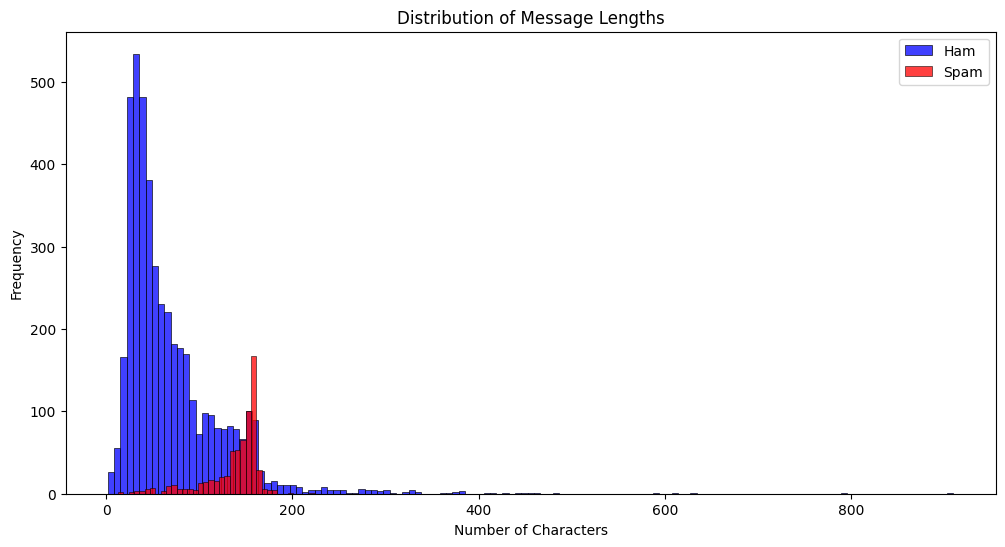

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'], label='Ham', color='blue')
sns.histplot(df[df['target']==1]['num_characters'], label='Spam', color='red')

plt.legend()  # Adds a legend to the graph
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.title('Distribution of Message Lengths')

plt.show()

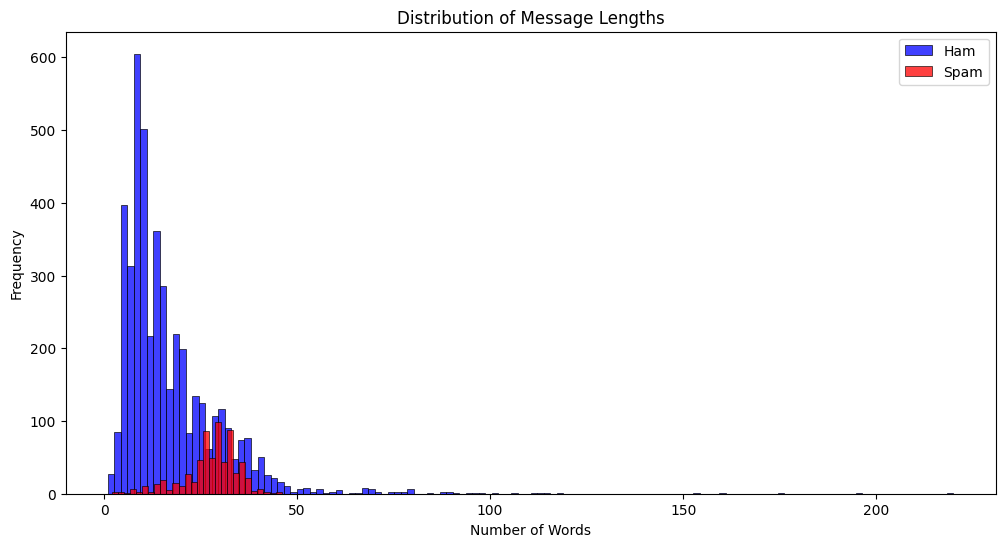

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'], label='Ham', color='blue')
sns.histplot(df[df['target']==1]['num_words'], label='Spam', color='red')

plt.legend()  # Adds a legend to the graph
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Message Lengths')

plt.show()

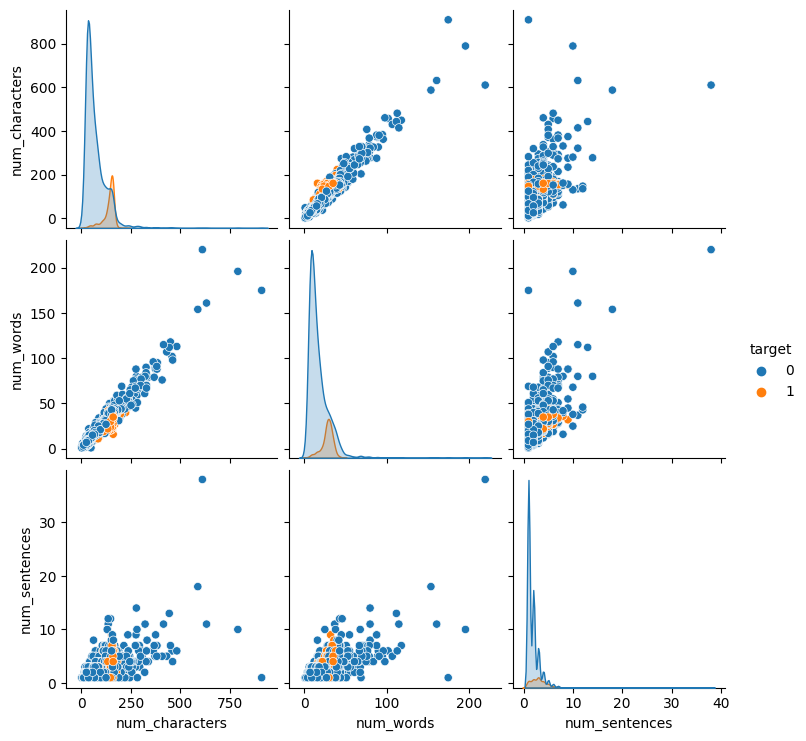

In [41]:
sns.pairplot(df, hue='target')
plt.show()

In [42]:
# Calculate correlation only for numerical features
numerical_df = df[['target', 'num_characters', 'num_words', 'num_sentences']]
correlation_matrix = numerical_df.corr()

# Print or display the correlation matrix
print(correlation_matrix)

                  target  num_characters  num_words  num_sentences
target          1.000000        0.384717   0.262912       0.263939
num_characters  0.384717        1.000000   0.965760       0.624139
num_words       0.262912        0.965760   1.000000       0.679971
num_sentences   0.263939        0.624139   0.679971       1.000000


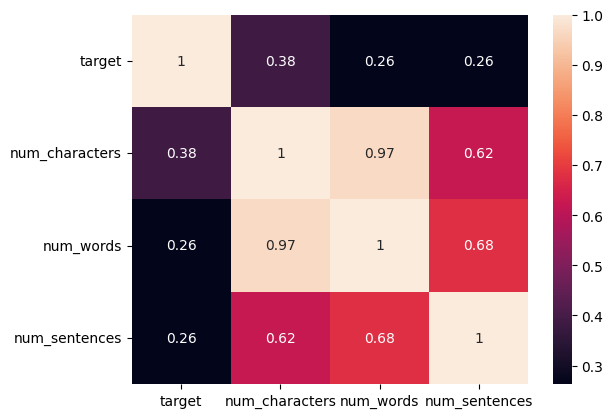

In [43]:
sns.heatmap(df[['target', 'num_characters', 'num_words', 'num_sentences']].corr(), annot=True)
# Only include numerical features for correlation calculation and add annotations.
plt.show()

#**3. Data Preprocessing**
###  -**Lower Case**
### -**Tokenization** : Shabdon ko chhote-chhote bhagon mein divide karna, jisse hum unhein acchi tarah se samajh sakein.
###  -**Removing special characters**
###  -**Removing stop words and punctuation**
###  -**Stemming** : Shabdon ke aakhri bhag ko hatana, jisse hum unke mool rupak ko pahunch sakein.

In [44]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [45]:
from tkinter.constants import Y
def transform_text(text):
  text = text.lower() #lowercase
  text = nltk.word_tokenize(text) #Tokenization

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i) # Removing special characters

  text = y[:] #cloning
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i) #Removing stop words and punctuation

  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))#Stemming

  return " ".join(y)

In [46]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Adarsh
[nltk_data]     Anand\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [47]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
transform_text('Hi My name is Adarsh %% Anand ? I am learning machine language')

'hi name adarsh anand learn machin languag'

In [49]:
df['text'][11]

'SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info'

In [50]:
transform_text(df['text'][11])

'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info'

In [51]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [52]:
df['transformed_text'] = df['text'].apply(transform_text)

In [57]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [58]:
from wordcloud import WordCloud as w
wc = w(width=1000,height=1000,min_font_size=10,background_color='white')

In [59]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

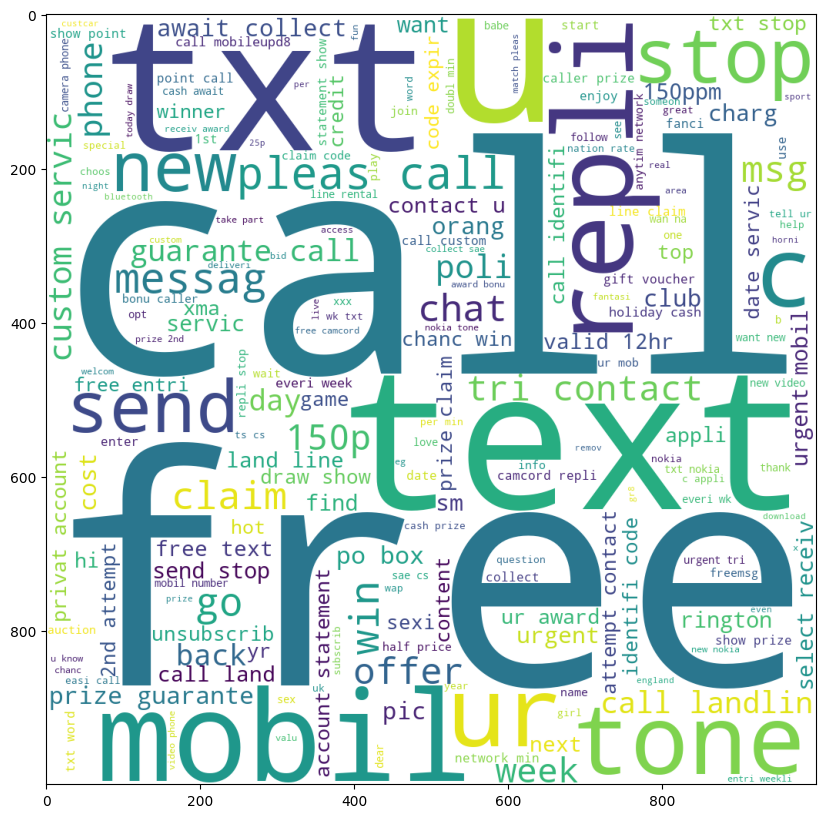

In [60]:
plt.figure(figsize=(10,10))
plt.imshow(spam_wc)

In [61]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

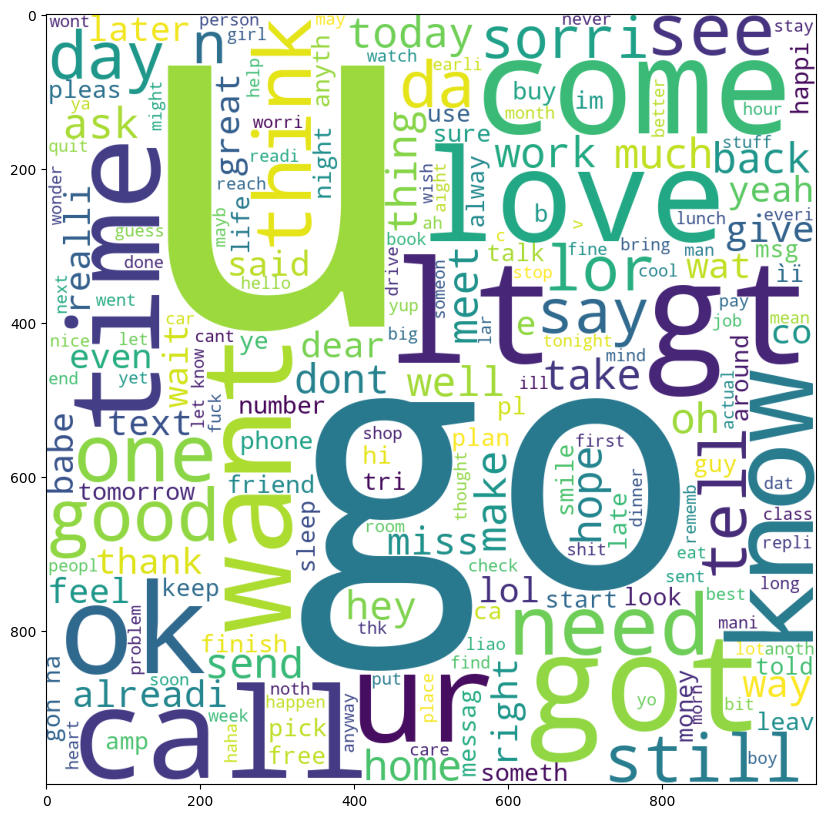

In [62]:
plt.figure(figsize=(10,10))
plt.imshow(ham_wc)

##Most used 30 words in ham and spam

In [63]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [64]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
  for words in msg.split():
    spam_corpus.append(words)

In [65]:
len(spam_corpus)

9939

In [66]:
from collections import Counter
c = pd.DataFrame(Counter(spam_corpus).most_common(30))
c

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


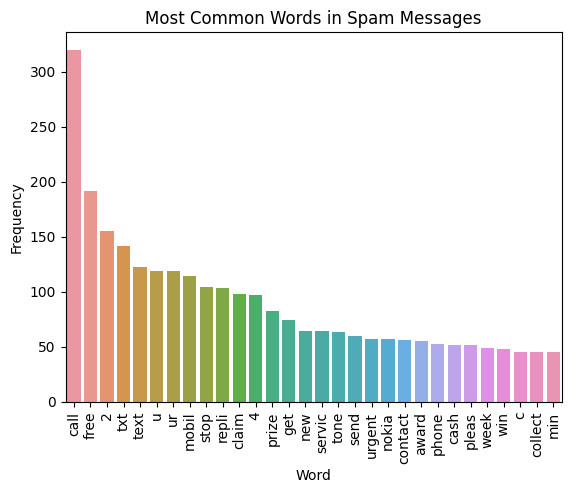

In [67]:
sns.barplot(x = c[0], y = c[1])
plt.xticks(rotation='vertical') # Rotate x-axis labels for better readability
plt.xlabel('Word') # Add x-axis label
plt.ylabel('Frequency') # Add y-axis label
plt.title('Most Common Words in Spam Messages') # Add a title to the plot
plt.show() # Display the plot

In [68]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
  for words in msg.split():
    ham_corpus.append(words)

In [69]:
len(ham_corpus)

35404

In [70]:
from collections import Counter
c = pd.DataFrame(Counter(ham_corpus).most_common(30))
c

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


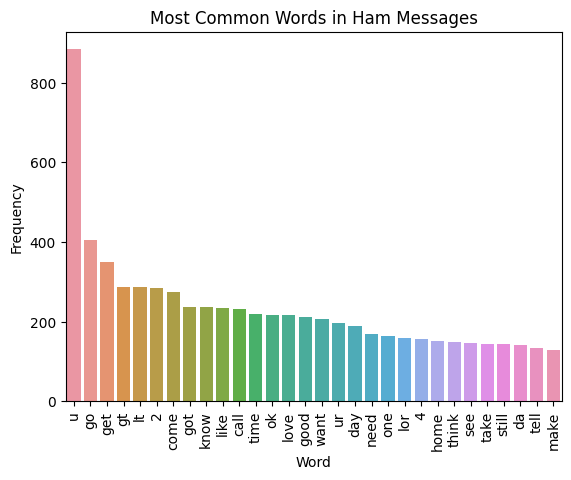

In [71]:
sns.barplot(x = c[0], y = c[1])
plt.xticks(rotation='vertical') # Rotate x-axis labels for better readability
plt.xlabel('Word') # Add x-axis label
plt.ylabel('Frequency') # Add y-axis label
plt.title('Most Common Words in Ham Messages') # Add a title to the plot
plt.show() # Display the plot

#4. Model Building

In [72]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
cv = CountVectorizer()
tfidf = TfidfTransformer()

In [73]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [74]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [75]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [76]:
X.shape

(5169, 6708)

In [77]:
y = df['target'].values

In [78]:
len(y)

5169

In [79]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [82]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [83]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [84]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [85]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [86]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [87]:
X = tfidf.fit_transform(cv.fit_transform(df['transformed_text'])).toarray()

In [88]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [89]:
X.shape

(5169, 6708)

In [90]:
y = df['target'].values

In [91]:
len(y)

5169

In [92]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [95]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [96]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [97]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [98]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [99]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


tfidf -> mnb

In [100]:
# prompt: Import logistic regression import SBC import multinomial nb import decision tree classifier import. K neighbors classifier, import random forest classifier. Import, add a boost classifier. Import bagging classifier. Import extra tree classifier. Import gradient boosting classifier. Import XGB classifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [101]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [102]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [103]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision

In [104]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [105]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

  print("For ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.937137330754352
Precision -  0.8543689320388349
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9729206963249516
Precision -  0.9435483870967742


In [106]:
from pandas import DataFrame
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [107]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.972921,0.974138
8,ETC,0.972921,0.982456
10,xgb,0.972921,0.943548
5,RF,0.971954,1.000000
6,AdaBoost,0.961315,0.945455
2,NB,0.959381,1.000000
7,BgC,0.958414,0.862595
9,GBDT,0.952611,0.923810
4,LR,0.951644,0.940000
3,DT,0.937137,0.854369


In [108]:
performance_df2 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [109]:
performance_df2

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
10,xgb,0.972921,0.943548
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [110]:
performance_df1 = pd.melt(performance_df, id_vars="Algorithm")

In [111]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.972921
1,ETC,Accuracy,0.972921
2,xgb,Accuracy,0.972921
3,RF,Accuracy,0.971954
4,AdaBoost,Accuracy,0.961315
5,NB,Accuracy,0.959381
6,BgC,Accuracy,0.958414
7,GBDT,Accuracy,0.952611
8,LR,Accuracy,0.951644
9,DT,Accuracy,0.937137


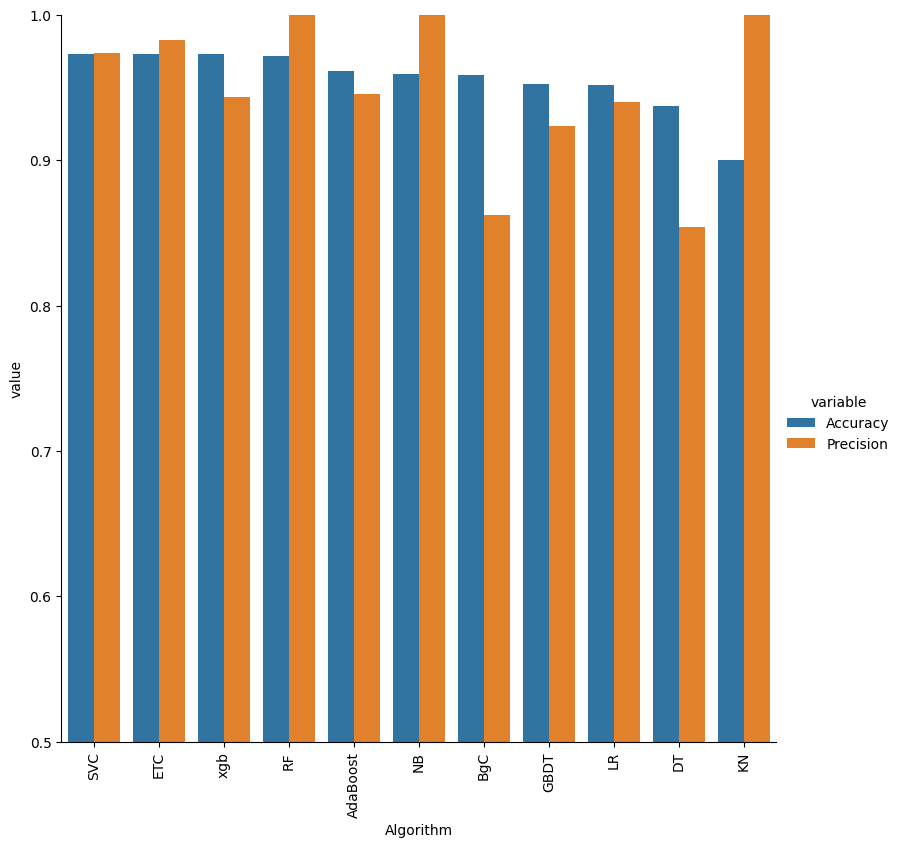

In [112]:
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=8)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

#Model Improvement
##1. Change the max_features parameter of IfIdf

In [113]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [114]:
new_df = performance_df.merge(temp_df, on='Algorithm')

In [115]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.972921,0.974138,0.972921,0.974138
1,ETC,0.972921,0.982456,0.972921,0.982456
2,xgb,0.972921,0.943548,0.972921,0.943548
3,RF,0.971954,1.000000,0.971954,1.000000
4,AdaBoost,0.961315,0.945455,0.961315,0.945455
5,NB,0.959381,1.000000,0.959381,1.000000
6,BgC,0.958414,0.862595,0.958414,0.862595
7,GBDT,0.952611,0.923810,0.952611,0.923810
8,LR,0.951644,0.940000,0.951644,0.940000
9,DT,0.937137,0.854369,0.937137,0.854369


#After Scaling

In [116]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [117]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
X = scalar.fit_transform(X)

In [118]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [119]:
X.shape

(5169, 6708)

In [120]:
y = df['target'].values

In [121]:
len(y)

5169

In [122]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [123]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [124]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[786 110]
 [ 18 120]]
0.5217391304347826


In [125]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9690522243713733
[[876  20]
 [ 12 126]]
0.863013698630137


In [126]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [127]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision

In [128]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9690522243713733, 0.9344262295081968)

In [129]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

  print("For ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9690522243713733
Precision -  0.9344262295081968
For  KN
Accuracy -  0.8965183752417795
Precision -  1.0
For  NB
Accuracy -  0.9690522243713733
Precision -  0.863013698630137
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
For  LR
Accuracy -  0.9661508704061895
Precision -  0.9478260869565217
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9729206963249516
Precision -  0.9435483870967742


In [130]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_Scaling':accuracy_scores,'Precision_Scaling':precision_scores})

In [131]:
new_df_scaled = new_df.merge(temp_df, on='Algorithm')

In [132]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_Scaling,Precision_Scaling
0,SVC,0.972921,0.974138,0.972921,0.974138,0.969052,0.934426
1,ETC,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456
2,xgb,0.972921,0.943548,0.972921,0.943548,0.972921,0.943548
3,RF,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
4,AdaBoost,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455
5,NB,0.959381,1.000000,0.959381,1.000000,0.969052,0.863014
6,BgC,0.958414,0.862595,0.958414,0.862595,0.958414,0.862595
7,GBDT,0.952611,0.923810,0.952611,0.923810,0.952611,0.923810
8,LR,0.951644,0.940000,0.951644,0.940000,0.966151,0.947826
9,DT,0.937137,0.854369,0.937137,0.854369,0.935203,0.838095


In [133]:
#Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier


In [134]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [135]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [136]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9682539682539683


In [137]:
#Applying Stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [138]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [139]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9545454545454546


In [140]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))